# EEG Power in Frequency Bands

This example can be referenced by [citing the package](https://github.com/neuropsychology/NeuroKit#citation).

**This example is not ready. We need your help to help us create a small example on how to compute do frequency power analysis for EEG data!**

In [46]:
# Load packages
import numpy as np
import pandas as pd
import neurokit2 as nk

In [47]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

## EEG Frequency Bands

From fastest to slowest:

  - **Gamma** (30-80 Hz)
  - **Beta** (13-30 Hz): Strongest in the frontocentral regions.
    - **Beta 1** (13–16 Hz)
    - **Beta 2** (16–20 Hz)
    - **Beta 3** (20–28 Hz)
  - **SMR** (13-15 Hz): Sensorimotor rhythm over the sensorimotor cortex. SMR typically decreases in amplitude when the corresponding sensory or motor areas are activated.
  - **Alpha** (8-13 Hz): Strongest in the occipital areas at the back of the scalp (visual cortex). Alpha power is assumed to be inversely related to cortical activation. Alpha power could be regarded as an index of top-down processing, representing a mechanism for increasing the signal-to-noise ratio.
  - **Mu** (9-11 Hz): The mu rhythm can be found in the frontoparietal region: over the motor cortex, in a band approximately from ear to ear.
  - **Theta** (4-8 Hz): Midline theta is usually maximal in the frontal or fronto-central regions.
  - **Delta** (1-4 Hz): Strongest in frontal areas. Inhibition of the sensory afferences (Harmony, 2013).

Note that the ranges are approximate and artificial, and studies are quite [inconsistent](https://sapienlabs.org/the-remarkable-inconsistency-of-frequency-band-definitions/) in their definition. 

## Preprocessing

In [48]:
# Load the NeuroKit package and other useful packages
import neurokit2 as nk
import mne

In [49]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

In [50]:
raw = nk.data("eeg_1min_200hz")

events = mne.find_events(raw, stim_channel='STI 014', verbose=False)
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'face': 5, 'buttonpress': 32}
              
sampling_rate = raw.info["sfreq"]  # Store the sampling rate

Effective window size : 1.280 (s)


C:\Users\domma\AppData\Roaming\Python\Python39\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


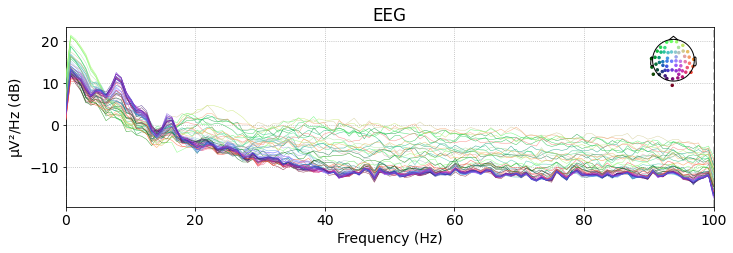

In [51]:
spectrum = raw.compute_psd(method="welch")

fig = spectrum.plot()

## Frontal Alpha Asymmetry (FAA)

Frontal Alpha Asymmetry (FAA) is the difference between right and left alpha activity over frontal regions of the brain (Davidson et al., 1990). Relatively higher right to left alpha power has commonly been interpreted as relatively higher left to right brain activity (Reznik and Allen 2018). The laterality quotient (LQ) is calculated by subtracting left alpha power from right alpha power ($log_{right} - log_{left}$).



In [52]:
# bandpass filter in the alpha band
raw.filter(8, 12, verbose=False)

# epoch
epochs = mne.Epochs(raw, events=events, event_id=event_dict, 
                    tmin=-1, tmax=3, baseline=None,
                    reject=dict(eeg=100e-6, eog=200e-6),  # 100 µV, 200 µV
                    preload=True, verbose=False)

# remove evoked response
epochs.subtract_evoked()

# get analytic signal (envelope)
epochs.apply_hilbert(envelope=True)

# Get channels
data = epochs.pick(["eeg"], verbose=False).to_data_frame()

data.head()


Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: STI 005, STI 006, STI 014, STI 015, STI 004, STI 001, STI 002, EOG 061, STI 003, STI 016
[done]


,time,condition,epoch,EEG 001,EEG 002,EEG 003,EEG 004,EEG 005,EEG 006,EEG 007,...,EEG 051,EEG 052,EEG 053,EEG 054,EEG 055,EEG 056,EEG 057,EEG 058,EEG 059,EEG 060
0,-1.000,auditory/left,2,4.603340,5.577354,5.549989,2.294839,1.603964,8.190367,6.997543,...,3.343396,3.490367,0.495476,2.107493,3.614102,4.115371,2.246272,3.192879,3.651536,4.649433
1,-0.995,auditory/left,2,4.130175,4.795339,4.697831,3.770529,1.905294,6.939186,5.987536,...,5.374473,5.517775,0.415732,2.847505,5.838453,6.378043,3.554294,5.083503,5.887976,6.621199
2,-0.990,auditory/left,2,3.757025,4.743189,4.512835,3.853489,1.749135,6.568133,5.846587,...,5.241180,5.575242,0.372363,2.161122,5.567885,6.417209,3.076908,4.609265,5.671409,6.621751
3,-0.985,auditory/left,2,4.266403,5.151007,4.877517,4.480817,2.083486,7.107199,6.292162,...,5.946933,6.280525,0.406884,2.435819,6.318629,7.134714,3.336008,5.231508,6.358379,7.110262
4,-0.980,auditory/left,2,4.025493,5.072771,4.691993,4.604783,2.055094,6.765428,6.090766,...,5.881406,6.355397,0.373503,1.838393,6.152002,7.161327,2.931837,4.898243,6.209309,7.028288


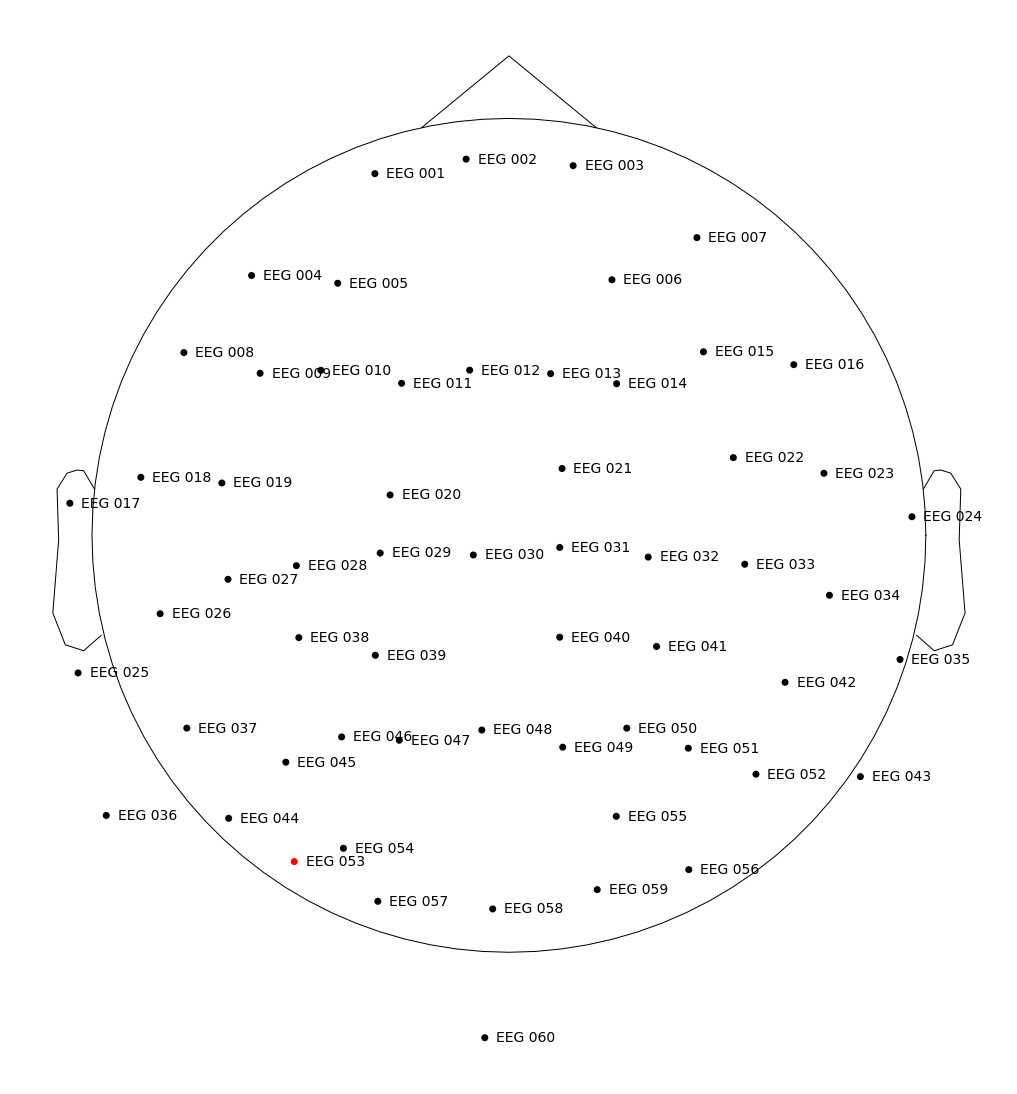

In [53]:
fig = epochs.plot_sensors(show_names=True)

This is work in progress for now. Help is needed to finish this example!

See https://mne.tools/dev/auto_examples/time_frequency/time_frequency_global_field_power.html

In [54]:
data["Left"] = data[["EEG 001", "EEG 002", "EEG 004", "EEG 005"]].mean(axis=1)
data["Right"] = data[["EEG 003", "EEG 006", "EEG 007"]].mean(axis=1)

data["FAA"] = data["Right"] - data["Left"]

## Frontal Midline Theta (FMT)





Work in Progress. Please help!

## 1/f Electrophysiological Noise

Electrophysiological signal is not a simple superposition of sinusoids of various frequencies, and its spectrum should not be interpreted as such. 

Individual frequencies are indeed not independent of one another (Milotti, 2002). The EEG power spectrum is dominantly structured by a decreasing function with lower power at higher frequencies that approximates a **1/f pattern** (Pritchard, 1992; Voytek et al., 2015). There is an inverse relationship between frequency and power, and the steepness with which the power drops off as the frequency gets higher is represented by the exponent γ.

Estimation of the 1/f exponent γ (Voytek et al., 2015) provides a consolidated view of the differences across bands and can be used to compute the difference between any two frequencies if desired. The 1/f decay exponent is best estimated in the range of 2–30 Hz where baseline drifts, line noise and distortions introduced by band pass filters have the least impact (Newson, 2019).
